# CiFAR-10 image classification using CNN

CIFAR-10 est un ensemble de données composé de plusieurs images réparties dans les 10 classes suivantes : Avions[0], Voitures[1], Des oiseaux[2], Chats[3], Cerf[4], Chiens[5], Grenouilles[6], Les chevaux[7], Navires[8], Camions[9]

ÉNONCÉ DU PROBLÈME :

>> On cherche a construire un modèle de classification d'image.

*L'ensemble de données se compose de 60 000 images couleur 32x32 et de 6 000 images de chaque classe.*
*Les images ont une faible résolution (32x32).*

Source de données: https://www.cs.toronto.edu/~kriz/cifar.html

# Import des packages et du data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from keras.datasets import cifar10
(x_train, y_train) , (x_test, y_test) = cifar10.load_data()

In [3]:
x_train.shape

(50000, 32, 32, 3)

---
>Nos données d'entraînement contiennent 50 000 échantillons, chacun étant une image de hauteur=32\*largeur=32 et ayant 3 canaux

---

In [4]:
x_test.shape

(10000, 32, 32, 3)

---
>Nos données de test contiennent 10 000 échantillons, chacun étant une image de hauteur=32\*largeur=32 et ayant 3 canaux (rouge, vert et bleu)

---

In [5]:
print(f"Les labels des données d'apprentissages sont y_train de forme {y_train.shape}")
print("###"*10)
print(f"Les labels des données de test sont y_test de forme {y_test.shape}")


Les labels des données d'apprentissages sont y_train de forme (50000, 1)
##############################
Les labels des données de test sont y_test de forme (10000, 1)


---

---

# Visualisation des données

On a les 10 classes suivantes : 

- Avions[0], 
- Voitures[1], 
- Des oiseaux[2], 
- Chats[3], 
- Cerf[4], 
- Chiens[5], 
- Grenouilles[6], 
- Les chevaux[7], 
- Navires[8], 
- Camions[9]

[1]


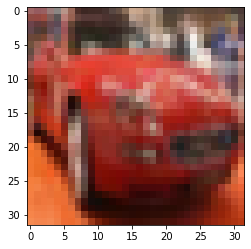

In [6]:
i = 5
plt.imshow(x_train[i])
print(y_train[i])

In [7]:
n_row, n_col = 3, 3
labels = ["Avions", 
          "Voitures", 
          "Des oiseaux", 
          "Chats", 
          "Cerf",
          "Chiens",
          "Grenouilles", 
          "Les chevaux", 
          "Navires", 
          "Camions"]

In [8]:
import random
def generate_random_list(number=32):
    randomlist = []
    for i in range(0,9):
        n = random.randint(0,number)
        randomlist.append(n)
    return randomlist

[0]


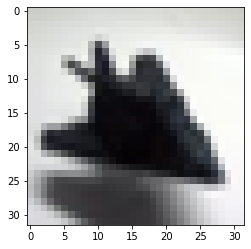

In [9]:
random_list = generate_random_list()
i = random_list[0]
plt.imshow(x_train[i])
print(y_train[i])

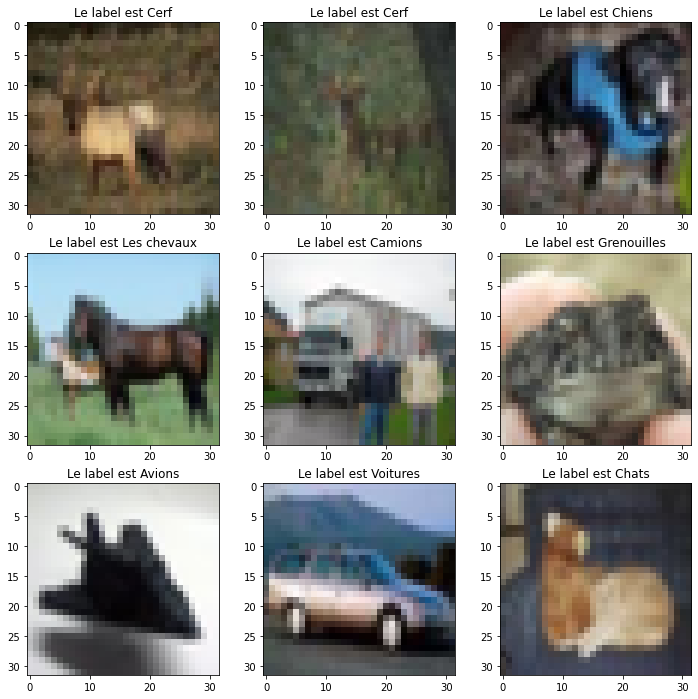

In [10]:
_, axs = plt.subplots(n_row, n_col, figsize=(12, 12))
axs = axs.flatten()
random_list = generate_random_list()
for i, ax in zip(random_list, axs):

    ax.imshow(x_train[i])
    ax.set_title(f"Le label est {labels[int(y_train[i])]}")
plt.show()

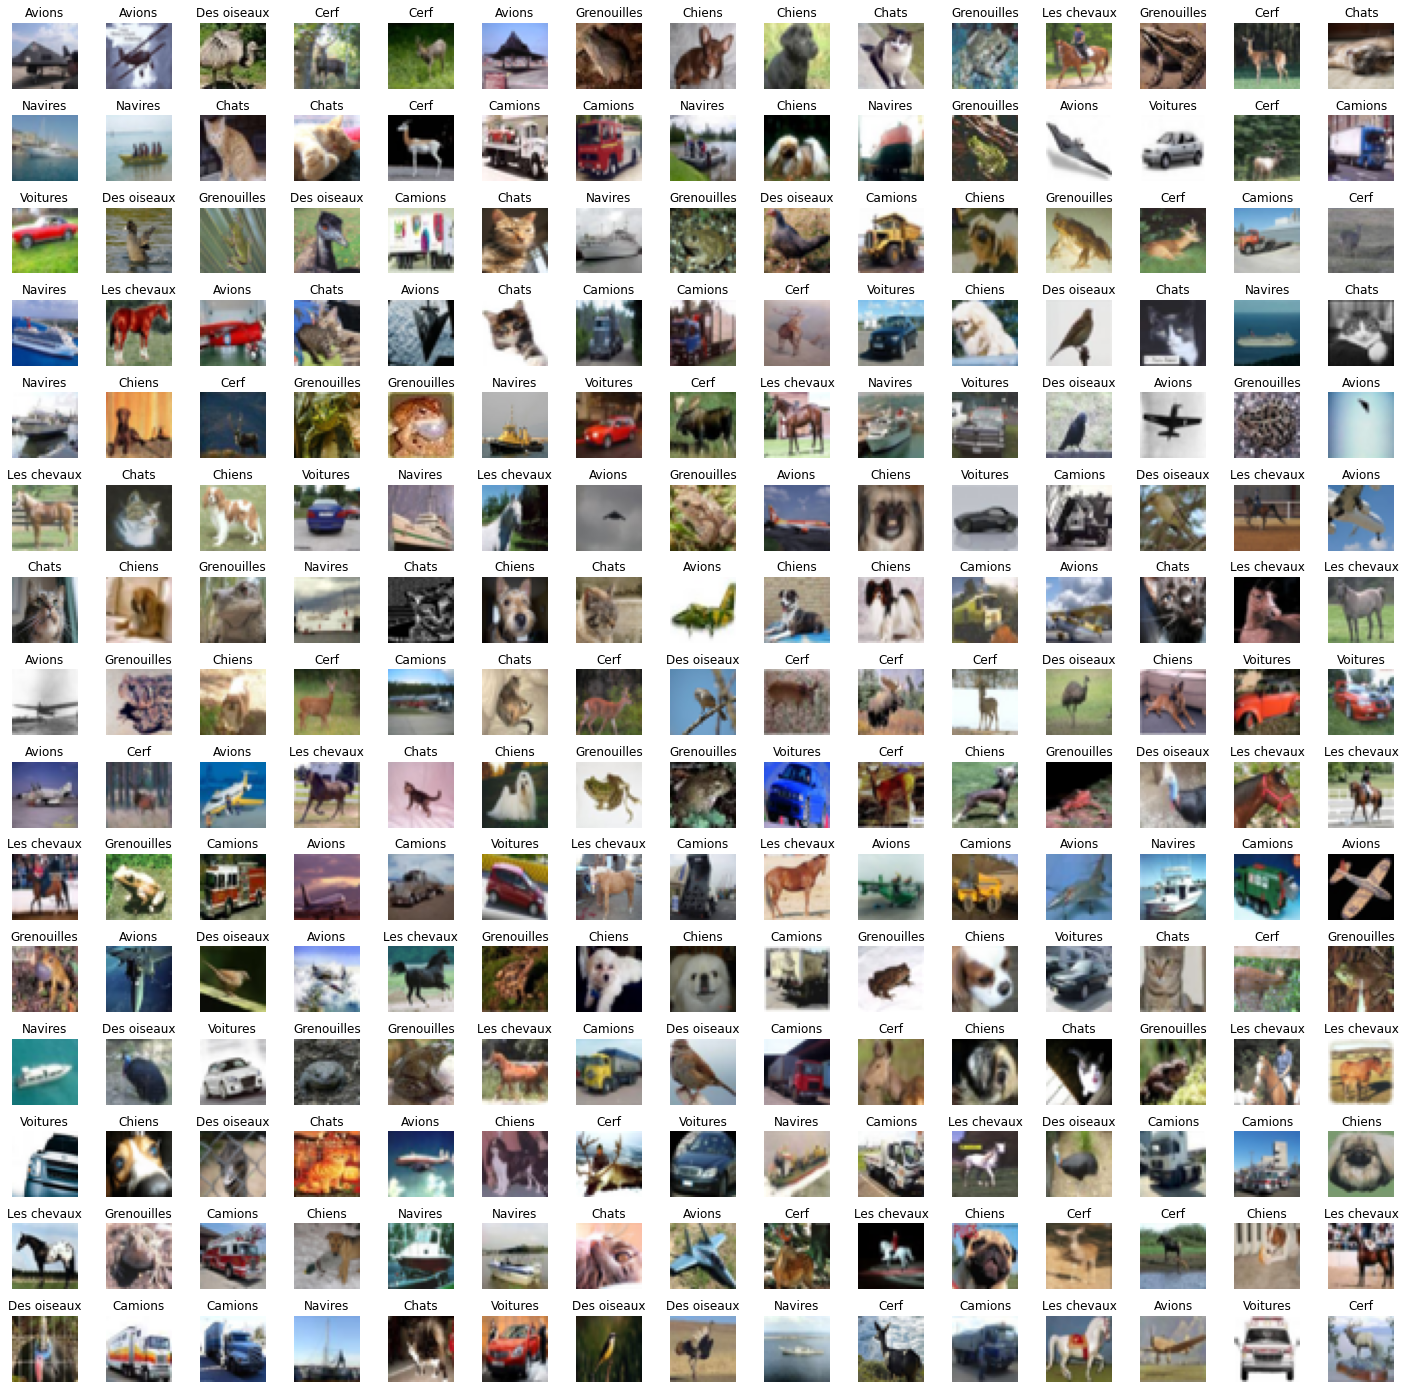

In [11]:
w_grid = 15
l_grid = 15

fig, axes = plt.subplots(l_grid, w_grid, figsize = (25,25))
axes = axes.ravel()

n_training = len(x_train)

for i in np.arange(0, l_grid * w_grid):
    index = np.random.randint(0, n_training)
    axes[i].imshow(x_train[index])
    axes[i].set_title(f"{labels[int(y_train[index])]}")
    axes[i].axis('off')
plt.subplots_adjust(hspace = 0.4)

In [12]:
unique, counts = np.unique(y_train, return_counts=True)

In [13]:
list(unique)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [14]:
hist_data = pd.DataFrame(np.asarray((labels, counts)).T,columns=["labels","count"])

In [15]:
hist_data["count"] = hist_data["count"].astype('float');hist_data

,labels,count
0,Avions,5000.0
1,Voitures,5000.0
2,Des oiseaux,5000.0
3,Chats,5000.0
4,Cerf,5000.0
5,Chiens,5000.0
6,Grenouilles,5000.0
7,Les chevaux,5000.0
8,Navires,5000.0
9,Camions,5000.0


<Figure size 1800x1440 with 0 Axes>

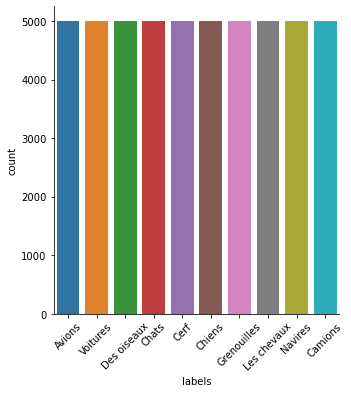

In [16]:
plt.figure(figsize=(25,20))
sns.catplot(x='labels',y='count',data=hist_data,kind='bar')
plt.xticks(rotation=45)
plt.show()

 Toutes les classes ont le meme nombre d'images soit 5000 images par classe

# Preparation de données

nous devons convertir chaque image en un type *float* car nous en aurons besoin plus tard pour l'augmentation des données et la phase d'apprentissage

In [17]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [18]:
number_cat = 10

In [19]:
import keras
y_train = keras.utils.np_utils.to_categorical(y_train,number_cat)

In [20]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [21]:
y_test = keras.utils.np_utils.to_categorical(y_test,number_cat)

In [22]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

Normalisation des images

In [23]:
x_train = x_train/255
x_test = x_test/255

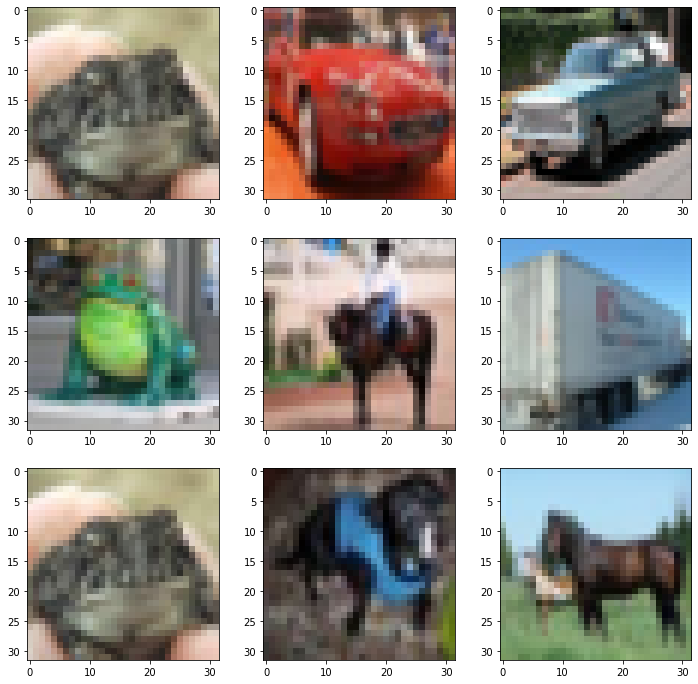

In [24]:
_, axs = plt.subplots(n_row, n_col, figsize=(12, 12))
axs = axs.flatten()
random_list = generate_random_list()
for i, ax in zip(random_list, axs):

    ax.imshow(x_train[i])
    
plt.show()

In [25]:
x_train.shape

(50000, 32, 32, 3)

In [26]:
input_shape = x_train.shape[1:]

In [27]:
input_shape

(32, 32, 3)

# Modèlisation et apprentissage

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard
import tensorflow as tf

In [29]:
cnn_model = Sequential()
# création d'une couche de convolution 2D avec 32 filtres
# chaque filtre est formé par une matrice 3*3 avec une fonction d'activation relu
cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3),
                     activation= 'relu', input_shape=input_shape))
cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3),
                     activation= 'relu'))
# Sous-échantillonne l'entrée selon ses dimensions spatiales (hauteur et largeur)
# en prenant la valeur maximale sur une fenêtre d'entrée (de taille définie par pool_size )
# pour chaque canal de l'entrée
cnn_model.add(MaxPooling2D(2,2))
# supprimer 30% des neuronnes
cnn_model.add(Dropout(0.35))
cnn_model.add(Conv2D(filters = 128, kernel_size = (3,3),
                     activation= 'relu'))
cnn_model.add(Conv2D(filters = 128, kernel_size = (3,3),
                     activation= 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.25))

cnn_model.add(Flatten())
cnn_model.add(Dense(units=1024, activation = 'relu'))
cnn_model.add(Dense(units=1024, activation = 'relu'))
cnn_model.add(Dense(units=10, activation = 'softmax'))

2022-02-28 17:57:52.364576: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [30]:
cnn_model.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001), metrics = ['accuracy'])

batch_size c'est combien d'image le model va prendre en meme temps

In [31]:
history = cnn_model.fit(x_train, y_train, batch_size=64, epochs = 1, shuffle=True)

2022-02-28 17:57:58.013042: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 614400000 exceeds 10% of free system memory.


782/782 [==============================] - 165s 210ms/step - loss: 1.6645 - accuracy: 0.4029


# Evaluate model


In [32]:
evaluation = cnn_model.evaluate(x_test, y_test)
print("Test Accuracy : {}".format(evaluation[1]))

313/313 [==============================] - 7s 22ms/step - loss: 1.2843 - accuracy: 0.5518
Test Accuracy : 0.551800012588501


In [33]:
x_test.shape

(10000, 32, 32, 3)

In [34]:
predicted_classes = cnn_model.predict(x_test)
predicted_classes = np.argmax(predicted_classes,axis=1)
predicted_classes

array([3, 0, 8, ..., 5, 1, 7])

In [35]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [36]:
y_test = y_test.argmax(1)

In [37]:
y_test

array([3, 8, 8, ..., 5, 1, 7])

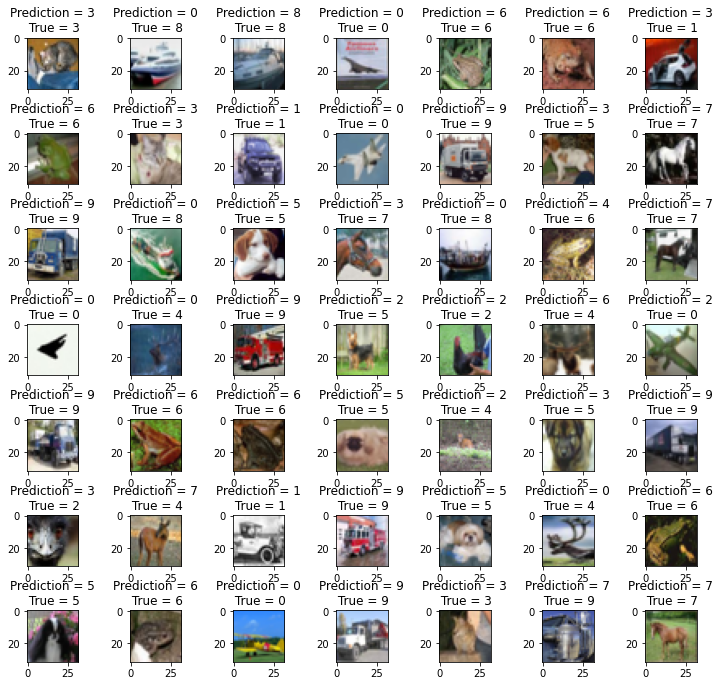

In [38]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize=(12,12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(x_test[i])
    axes[i].set_title(f"Prediction = {predicted_classes[i]}\n True = {y_test[i]}")
plt.subplots_adjust(wspace = 1)
plt.show()

<AxesSubplot:>

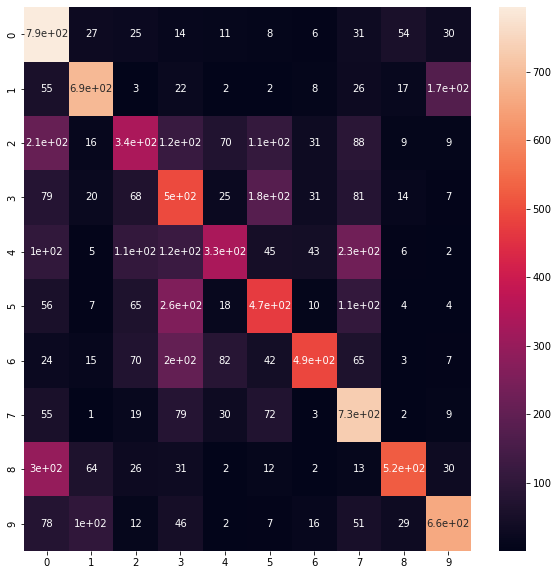

In [39]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predicted_classes)
cm
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True)

In [ ]:
import os 
directory = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(directory):
    os.makedirs(directory)
model_path = os.path.join(directory, 'keras_cifar10_trained_model.h5')
cnn_model.save(model_path)

# Data Augmentation

In [ ]:
import keras
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train/=255
x_test/=255

In [ ]:
n = 4 
x_train_sample = x_train[:n]

In [ ]:
x_train_sample.shape

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

dataget_train = ImageDataGenerator(rotation_range = 90)
dataget_train.fit(x_train_sample)

In [ ]:
#from scipy.misc.pilutil import toimage
from PIL import Image

fig = plt.figure(figsize = (20,2))
for x_batch in dataget_train.flow(x_train_sample, batch_size = n):
     for i in range(0,n):
            ax = fig.add_subplot(1, n, i+1)
            ax.imshow(x_batch[i])
     fig.suptitle('Augmented images (rotated 90 degrees)')
     plt.show()
     break;

In [ ]:
datage = ImageDataGenerator(vertical_flip=True)
datagen.fit(x_train_sample)

for X_batch in datagen.flow(x_train_sample, batch_size=4, seed=499):
  for i in range(0,4):
    plt.subplot(220 +1 +i)
    plt.imshow(X_batch[i])
  plt.show()
  break

# Apprentissage du modèle en utilsant des données augmentées

In [40]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rotation_range = 90,
                             width_shift_range = 0.1,
                             horizontal_flip = True,
                             vertical_flip = True)

In [41]:
datagen.fit(x_train)


In [42]:
cnn_model.fit_generator(datagen.flow(x_train, y_train, batch_size=32), epochs=2)

Epoch 1/2


/tmp/ipykernel_70251/4206881563.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  cnn_model.fit_generator(datagen.flow(x_train, y_train, batch_size=32), epochs=2)


1563/1563 [==============================] - 189s 121ms/step - loss: 1.7668 - accuracy: 0.3662
Epoch 2/2
1563/1563 [==============================] - 190s 121ms/step - loss: 1.6154 - accuracy: 0.4227


In [44]:
x_test.shape

(10000, 32, 32, 3)

In [47]:
y_test = keras.utils.np_utils.to_categorical(y_test,number_cat)

In [48]:
score = cnn_model.evaluate(x_test, y_test)
print('Test accuracy', score[1])

313/313 [==============================] - 7s 22ms/step - loss: 1.5265 - accuracy: 0.4653
Test accuracy 0.4652999937534332


In [49]:
import os 
directory = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(directory):
    os.makedirs(directory)
model_path = os.path.join(directory, 'keras_cifar10_trained_model_Augmentation.h5')
cnn_model.save(model_path)